<a href="https://colab.research.google.com/github/marciocardoso123/DATASCIENCE-/blob/main/C%C3%B3pia_de_Projeto_consulta_de_IBGEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Projeto Unicórnios:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
bd = pd.read_csv('/content/Startups+in+2021+end.csv') 

In [ ]:
bd.shape

(936, 8)

In [ ]:
bd.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
#renomear
bd.rename(columns={
    'Unnamed: 0' :'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Páis',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores'
}, inplace=True)

In [ ]:
#Verificando valores para converter os que forem nescessários
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor($)        936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Páis            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
#buscando campos nulos:
bd.isnull().sum()

Id                 0
Empresa            0
Valor($)           0
Data de Adesão     0
Páis               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

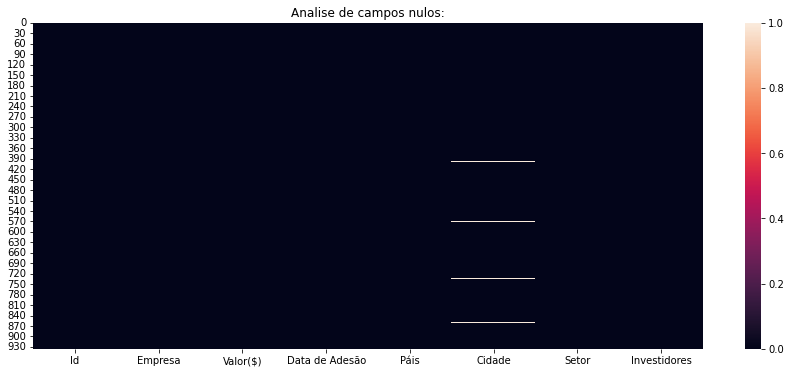

In [ ]:
#imagens do campos nulos com mapa de calor
plt.figure(figsize=(15,6))
plt.title('Analise de campos nulos:')
sns.heatmap(bd.isnull());

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
#request + selector
#função que retorna inf dos estados brasileiros
def scrap_state_info(state:str)->dict:
  print(f' Picking {state} info ...')
  state_url = f'https://www.ibge.gov.br/cidades-e-estados/{state}.html'
  page = requests.get(state_url)

  soup = BeautifulSoup(page.content, 'html.parser')
  indicadors = soup.select('.indicador')


  state_dict = {
      ind.select('.ind-label')[0].text: ind.select('.ind-value')[0].text
      for ind in indicadors
  }
  state_dict['Estado'] = state

  return state_dict
  #return [(ind.select('.ind-label')[0].text, ind.select('.ind-value')[0].text) for ind in indicadors]

scrap_state_info('RS')

 Picking RS info ...


{'Capital': 'Porto Alegre\xa0\xa0\xa0[2010]',
 'Densidade demográfica': '39,79 hab/km²\xa0\xa0\xa0[2010]',
 'Despesas empenhadas': '62.476.279,34 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Estado': 'RS',
 'Gentílico': 'gaúcho ou sul-rio-grandense',
 'Governador': 'EDUARDO FIGUEIREDO CAVALHEIRO LEITE\xa0\xa0\xa0[2019]',
 'IDH Índice de desenvolvimento humano': '0,746\xa0\xa0\xa0[2010]',
 'Matrículas no ensino fundamental': '1.269.309 matrículas\xa0\xa0\xa0[2020]',
 'População estimada': '11.466.630 pessoas\xa0\xa0\xa0[2021]',
 'Receitas realizadas': '66.397.468,18 R$ (×1000)\xa0\xa0\xa0[2017]',
 'Rendimento mensal domiciliar per capita': '1.787 R$\xa0\xa0\xa0[2021]',
 'Total de veículos': '7.689.278 veículos\xa0\xa0\xa0[2021]',
 'Área Territorial': '281.707,151 km²\xa0\xa0\xa0[2021]'}

In [ ]:
states = ['AC', 'AL', 'AP', 'AM', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MT', 'MS', 'MG', 'PA', 'PB', 'PR', 'PE', 'PI', 'RJ', 'RN', 'RS', 'RO', 'RR', 'SC', 'SP', 'SE', 'TO']
states_data = [scrap_state_info(state) for state in states]

 Picking AC info ...
 Picking AL info ...
 Picking AP info ...
 Picking AM info ...
 Picking BA info ...
 Picking CE info ...
 Picking DF info ...
 Picking ES info ...
 Picking GO info ...
 Picking MA info ...
 Picking MT info ...
 Picking MS info ...
 Picking MG info ...
 Picking PA info ...
 Picking PB info ...
 Picking PR info ...
 Picking PE info ...
 Picking PI info ...
 Picking RJ info ...
 Picking RN info ...
 Picking RS info ...
 Picking RO info ...
 Picking RR info ...
 Picking SC info ...
 Picking SP info ...
 Picking SE info ...
 Picking TO info ...


In [ ]:
df = pd.DataFrame(states_data)
df.head()

,Governador,Capital,Gentílico,Área Territorial,População estimada,Densidade demográfica,Matrículas no ensino fundamental,IDH Índice de desenvolvimento humano,Receitas realizadas,Despesas empenhadas,Rendimento mensal domiciliar per capita,Total de veículos,Estado
0,GLADSON DE LIMA CAMELI [2019],Rio Branco [2010],acriano,"164.173,431 km² [2021]",906.876 pessoas [2021],"4,47 hab/km² [2010]",156.679 matrículas [2020],"0,663 [2010]","6.632.883,11 R$ (×1000) [2017]","6.084.416,81 R$ (×1000) [2017]",888 R$ [2021],320.173 veículos [2021],AC
1,JOSE RENAN VASCONCELOS CALHEIROS FILHO [2019],Maceió [2010],alagoano,"27.830,661 km² [2021]",3.365.351 pessoas [2021],"112,33 hab/km² [2010]",464.704 matrículas [2020],"0,631 [2010]","11.950.438,46 R$ (×1000) [2017]","10.460.634,92 R$ (×1000) [2017]",777 R$ [2021],981.823 veículos [2021],AL
2,ANTONIO WALDEZ GÓES DA SILVA [2019],Macapá [2010],amapaense,"142.470,762 km² [2021]",877.613 pessoas [2021],"4,69 hab/km² [2010]",134.820 matrículas [2020],"0,708 [2010]","5.396.417,14 R$ (×1000) [2017]","4.224.464,09 R$ (×1000) [2017]",855 R$ [2021],224.208 veículos [2021],AP
3,WILSON MIRANDA LIMA [2019],Manaus [2010],amazonense,"1.559.167,878 km² [2021]",4.269.995 pessoas [2021],"2,23 hab/km² [2010]",700.104 matrículas [2020],"0,674 [2010]","17.328.459,43 R$ (×1000) [2017]","15.324.896,56 R$ (×1000) [2017]",800 R$ [2021],1.014.026 veículos [2021],AM
4,RUI COSTA DOS SANTOS [2019],Salvador [2010],baiano,"564.760,429 km² [2021]",14.985.284 pessoas [2021],"24,82 hab/km² [2010]",1.947.177 matrículas [2020],"0,660 [2010]","50.191.003,24 R$ (×1000) [2017]","45.570.160,00 R$ (×1000) [2017]",843 R$ [2021],4.695.972 veículos [2021],BA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Governador                               27 non-null     object
 1   Capital                                  27 non-null     object
 2   Gentílico                                27 non-null     object
 3   Área Territorial                         27 non-null     object
 4   População estimada                       27 non-null     object
 5   Densidade demográfica                    27 non-null     object
 6   Matrículas no ensino fundamental        27 non-null     object
 7   IDH Índice de desenvolvimento humano    27 non-null     object
 8   Receitas realizadas                      27 non-null     object
 9   Despesas empenhadas                      27 non-null     object
 10  Rendimento mensal domiciliar per capita  27 non-null     object


In [ ]:
#pandas e etapa de conversão de valores
state_df = df.copy()
state_df.columns = ['governor', 'capital', 'gentile', 'area', 'population', 'demographic_density', 'primary_school_enrollment', 'idh', 'realized_revenue', 'committed_expenses', 'income_per_capita', 'vehicle_total', 'code']
states_df = state_df[['code', 'governor', 'population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']]


In [ ]:
#remover pontos e excessos
states_df = states_df.replace({
    '\.': '',
    ',': '.',
    '\[\d+\]': '',
    ' hab/km²': '',
    ' km²': '',
    ' pessoas': '',
    ' matrículas': '',
    'R\$.*': '',
    ' veículos': ''
}, regex=True)

states_df.head()

num_cols = ['population', 'area', 'idh', 'income_per_capita', 'vehicle_total', 'primary_school_enrollment', 'committed_expenses', 'realized_revenue']

#tirando espaços nas bordas das Strings
states_df[num_cols] = states_df[num_cols].apply(lambda x: x.str.strip())

#converte todas as colunas numericas para tipos numericos
states_df[num_cols] = states_df[num_cols].apply(pd.to_numeric)
states_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   code                       27 non-null     object
 1   governor                   27 non-null     object
 2   population                 27 non-null     int64 
 3   area                       27 non-null     int64 
 4   idh                        27 non-null     int64 
 5   income_per_capita          27 non-null     int64 
 6   vehicle_total              27 non-null     int64 
 7   primary_school_enrollment  27 non-null     int64 
 8   committed_expenses         27 non-null     int64 
 9   realized_revenue           27 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.2+ KB


In [ ]:
states_df.head()

,code,governor,population,area,idh,income_per_capita,vehicle_total,primary_school_enrollment,committed_expenses,realized_revenue
0,AC,GLADSON DE LIMA CAMELI,906876,164173431,663,888,320173,156679,608441681,663288311
1,AL,JOSE RENAN VASCONCELOS CALHEIROS FILHO,3365351,27830661,631,777,981823,464704,1046063492,1195043846
2,AP,ANTONIO WALDEZ GÓES DA SILVA,877613,142470762,708,855,224208,134820,422446409,539641714
3,AM,WILSON MIRANDA LIMA,4269995,1559167878,674,800,1014026,700104,1532489656,1732845943
4,BA,RUI COSTA DOS SANTOS,14985284,564760429,660,843,4695972,1947177,4557016000,5019100324


In [ ]:
#exportar para drive
from google.colab import drive
drive.mount('/content/drive')

states_df.to_csv('/content/drive/MyDrive/SimpleData.ai/Scrap/Data/ibge_states.csv')